# Energy System Modelling

This Juptyer Notebooks are the Tutorials (from Fabian Neumann) from Energy System Modelling, Summer Semester 2019 from Karlsruhe Institute of Technology


## Tutorial 1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

de = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/de_data.csv",
                 parse_dates = True, index_col = 0)
eu = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/eu_data.csv",
                 parse_dates = True, index_col = 0)
gb = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/gb_data.csv",
                 parse_dates = True, index_col = 0)

wind = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/wind.csv",
                 parse_dates = True, index_col = 0)
solar = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/solar.csv",
                 parse_dates = True, index_col = 0)
load = pd.read_csv("/home/colburn/Documents/Power_Modelling/ESM_Class_Data/tutorial_1/load.csv",
                 parse_dates = True, index_col = 0)

In [4]:
# Check to ensure the wind, solar, and load files are the same
print((wind['DE'] == de['wind']).all())

True


In [8]:
# Check that wind and solar TS are normalized to 
# per-unit of installed capacity, and the load 
# time series is normalized to MW
print("Wind Max: \n", wind.max())
print("Load Max: \n", load.max())

Wind Max: 
 DE    0.994588
GB    0.999998
EU    0.719222
dtype: float64
Load Max: 
 DE     79286.0
GB     55614.0
EU    539904.0
dtype: float64


In [9]:
print(de.describe())

               wind         solar          load
count  35064.000000  35064.000000  35064.000000
mean       0.265785      0.149262  54877.199806
std        0.239194      0.221564  10354.693128
min        0.000577      0.000000  29201.000000
25%        0.078827      0.000000  46321.750000
50%        0.181354      0.000000  54594.000000
75%        0.394514      0.268505  63953.250000
max        0.994588      0.913781  79286.000000


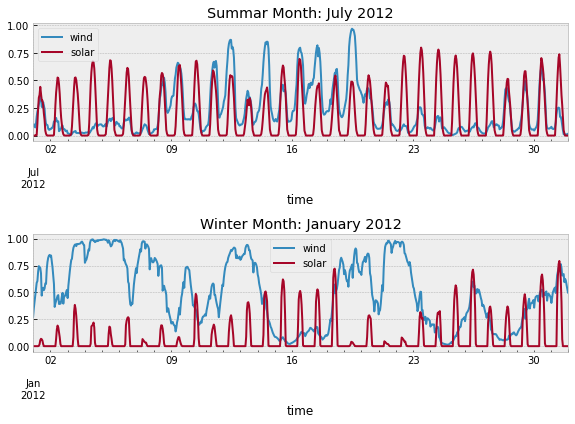

In [13]:
fig, axes = plt.subplots(2,1,figsize=(8,6))
de.loc['2012-07', ['wind', 'solar']].plot(ax = axes[0])
axes[0].set_title("Summar Month: July 2012")
de.loc['2012-01', ['wind', 'solar']].plot(ax = axes[1])
axes[1].set_title("Winter Month: January 2012")
fig.tight_layout()

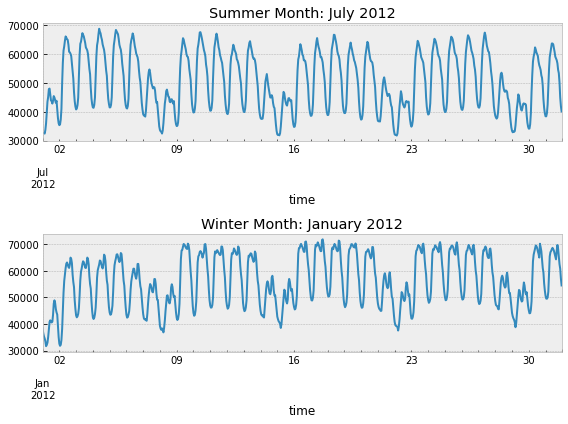

In [14]:
fig, axes = plt.subplots(2,1, figsize = (8,6))
de.loc['2012-07', 'load'].plot(ax=axes[0])
axes[0].set_title("Summer Month: July 2012")
de.loc['2012-01', 'load'].plot(ax=axes[1])
axes[1].set_title("Winter Month: January 2012")
fig.tight_layout()

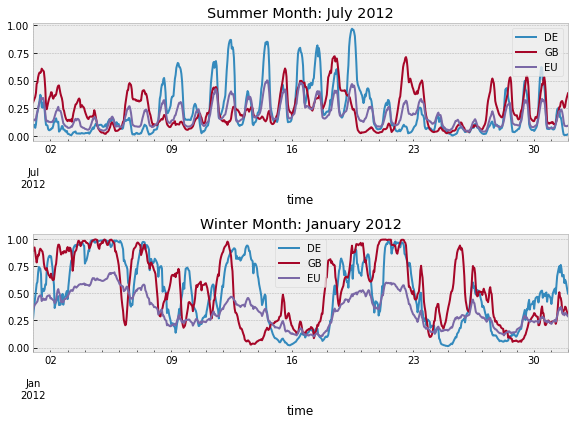

In [15]:
# Compairision of Wind in different areads
fig, axes = plt.subplots(2,1,figsize=(8,6))
wind.loc['2012-7', ['DE', 'GB', 'EU']].plot(ax=axes[0])
axes[0].set_title('Summer Month: July 2012')
wind.loc['2012-01', ['DE','GB','EU']].plot(ax=axes[1])
axes[1].set_title('Winter Month: January 2012')
fig.tight_layout()

<AxesSubplot:xlabel='time'>

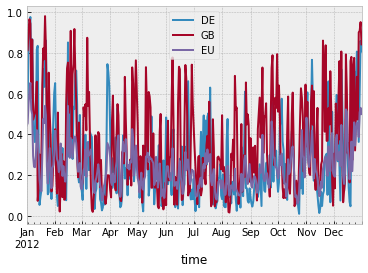

In [16]:
# Resample
# We have hourly data, lets resample to other time 
# by taking the average
wind.loc['2012', ['DE', 'GB', 'EU']].resample("D").mean().plot()

<AxesSubplot:xlabel='time'>

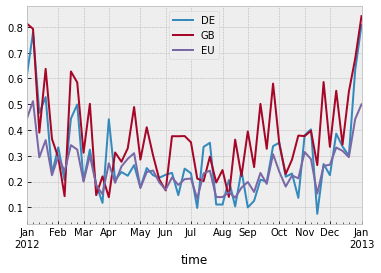

In [17]:
wind.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

<AxesSubplot:xlabel='time'>

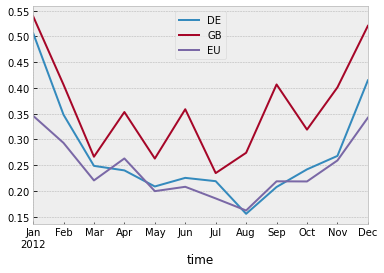

In [18]:
wind.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

<AxesSubplot:xlabel='time'>

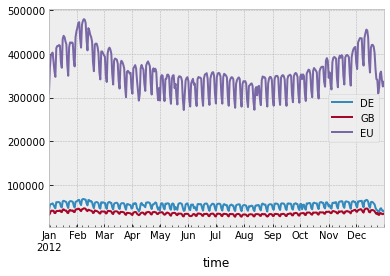

In [19]:
load.loc["2012",['DE','GB','EU']].resample('D').mean().plot()

<AxesSubplot:xlabel='time'>

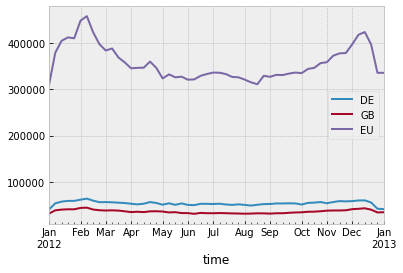

In [20]:
load.loc["2012",['DE','GB','EU']].resample('W').mean().plot()

<AxesSubplot:xlabel='time'>

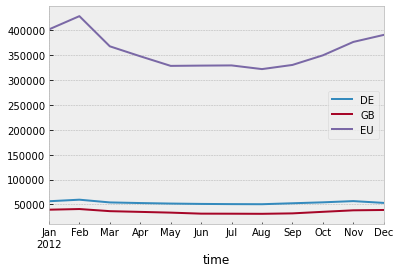

In [21]:
load.loc["2012",['DE','GB','EU']].resample('M').mean().plot()

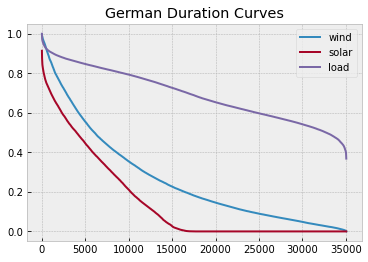

In [24]:
# Plotting the Duration Curve
de['wind'].sort_values(ascending=False).reset_index(drop=True).plot()
# Select column. sort the column in descending order.drop the date index.plot
de['solar'].sort_values(ascending=False).reset_index(drop=True).plot()

# Need to normalize Load (Wind and Solar already normalized)
l = de['load']
l = l / l.max() # normalize load
l.sort_values(ascending=False).reset_index(drop=True).plot()
plt.legend()
plt.title("German Duration Curves")
plt.show()

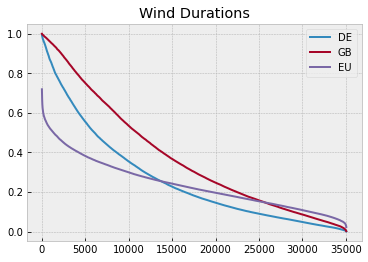

In [25]:
wind['DE'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['GB'].sort_values(ascending=False).reset_index(drop=True).plot()
wind['EU'].sort_values(ascending=False).reset_index(drop=True).plot()
plt.title("Wind Durations")
plt.legend()
plt.show()

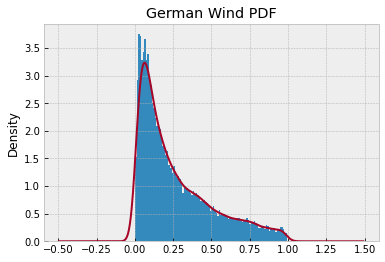

In [27]:
# In pandas we can plot both a Histogram or
# a Kenrnel Density Estimation (KDE) 

de['wind'].plot.hist(bins=100, density=True) #Hist
de['wind'].plot.density() # KDE

plt.title("German Wind PDF")
plt.show()

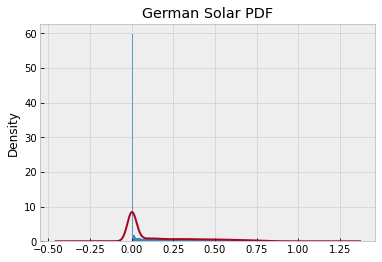

In [29]:
de['solar'].plot.hist(bins=100, density=True)
de['solar'].plot.density()
plt.title("German Solar PDF")
plt.show()

# Obviously that super high value of 0 is throwing
# off our visualization. We can adjust our axis

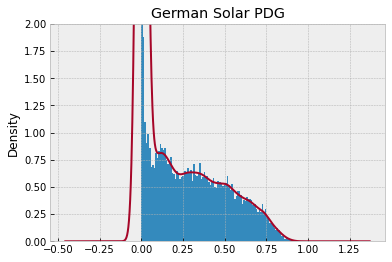

In [30]:
de['solar'].plot.hist(bins=100, density=True)
ax=de['solar'].plot.density() #assigned to ax to adjust
ax.set_ylim(ymax=2)
plt.title("German Solar PDG")
plt.show()

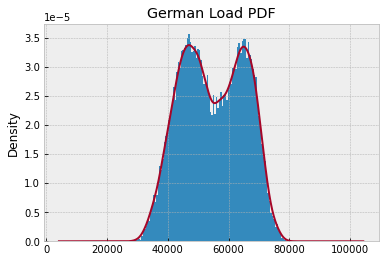

In [31]:
# Load PDF
de['load'].plot.hist(bins=100, density=True)
de['load'].plot.density()
plt.title("German Load PDF")
plt.show()

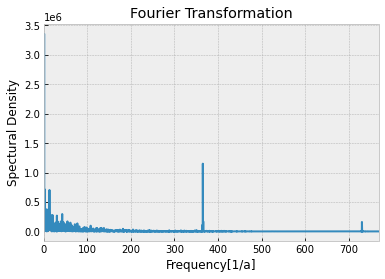

In [35]:
# Fast Fourier Transform

# Very important that you subtract the mean: Fourier 
# Transformation requires 0 mean. 

# numpy.fft.rfffreq determins the frequenes. Argument
# D indicates the distance between two data points, 
# in our case is one hour. We specify in terms a years:
# so 1/8760

# We are plitting the energy spectrum as a function
# of frequenciy


# HOW TO READ THIS
# Frequency gets shorter left to right:
# - 1/52 is week
# - 1/365 is a day
# - 1/730 is twice a day (evening/morning)
# taller the peak is how strong and persistent this 
# pattern is 
# look at 3blue1brown fourier video to refresh

# WIND
fft = abs(pd.Series(np.fft.rfft(de['wind']-de['wind'].mean()), # Substract mean
                    index = np.fft.rfftfreq(len(de), d= 1./8760))**2)
#print(fft.head(10))
fft.plot()
plt.xlim(0,768)
plt.xlabel('Frequency[1/a]') # x^-1 = 1/x
plt.ylabel("Spectural Density")
plt.title("Fourier Transformation")
plt.show()

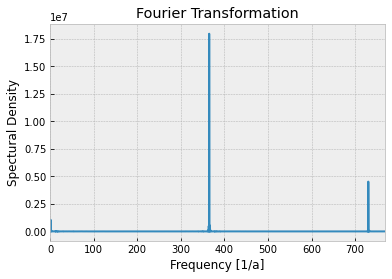

In [43]:
# Solar
fft = abs(pd.Series(np.fft.rfft(de['solar'] - de['solar'].mean()),
                             index=np.fft.rfftfreq(len(de), d=1./8760))**2)
fft.plot()
plt.xlim(0,768)
plt.xlabel('Frequency [1/a]')
plt.ylabel('Spectural Density')
plt.title('Fourier Transformation')
plt.show()

Mismatch Analsis:
$\gamma$ is relates average generation and average load
$\alpha$ is the share of wind and solar

$\Delta_{t} = \gamma \alpha W_{t} + \gamma(1-\alpha)S_{t}-L_{t}$



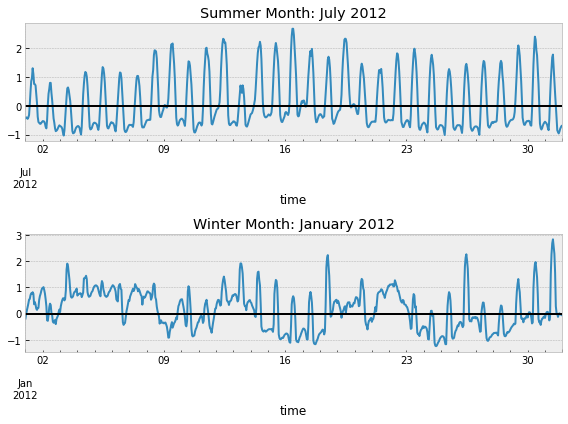

In [45]:
d = de
gamma = 1.0
alpha = 0.5
d = d/d.mean() # Normalize the timeseries
m = gamma*alpha*d['wind']+gamma*(1-alpha)*d['solar']-d['load']


# Plot Mismatch for a Winter and Summer Month
fig, axes = plt.subplots(2,1, figsize=(8,6))
m.loc['2012-07'].plot(ax=axes[0])
axes[0].set_title("Summer Month: July 2012")
m.loc['2012-01'].plot(ax=axes[1])
axes[1].set_title("Winter Month: January 2012")
for ax in axes:
    ax.axhline(0, color = 'black') #add horizontal line
fig.tight_layout()
plt.show()

## Effect of Seasonality

Tutorial 1 Part 2. 

Multiple Equations are defined to mimic the seasonality in Wind production, Solar Production, and Load. The excercise is to minimize the load imbalance assuming this seasonality and some other constants. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import minimize
plt.style.use('bmh')
%matplotlib inline

In [3]:
# Define Parameters 
A_w = 0.4
A_s = 0.75
A_l = 0.1
T = 1
phi = 0

In [13]:
# Define Wind, Solar, and Load Functions
def w(t, phi=0):
    return 1 + A_w * np.cos(2*t*np.pi/T-phi)
def s(t):
    return 1 - A_s * np.cos(2*t*np.pi/T)
def l(t):
    return 1 + A_l * np.cos(2*t*np.pi/T)

# Define the mismatch between solar+wind-Load
# Alpha is the mix between wind and solar
def mismatch(alpha, t, phi=phi):
    return alpha * w(t,phi) + (1-alpha)*s(t)-l(t)

# Define objective function as found in tutorial
def objective(alpha):
    return 1/T * integrate.quad(lambda t: mismatch(alpha, t, phi=phi)**2,0,T)[0]


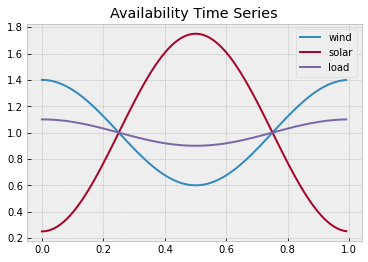

In [10]:
# Plot Availability time series

x = np.arange(0,1,0.01)
wind = plt.plot(x, w(x), label='wind')
solar=plt.plot(x, s(x), label='solar')
load = plt.plot(x, l(x), label= 'load')
plt.legend()
plt.title("Availability Time Series")
plt.show()

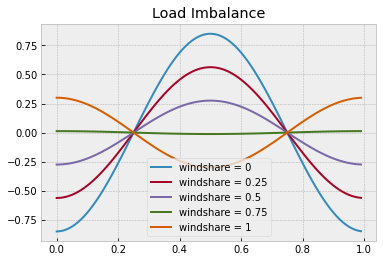

In [16]:
# Mismatch as a function of Wind share

alphas = [0, 0.25, 0.5, 0.75, 1]
for a in alphas:
    plt.plot(x, mismatch(a,x), label='windshare = {}'.format(a))
plt.legend()
plt.title("Load Imbalance")
plt.show()

In [17]:
# Minimize the load imbalance function
alpha = minimize(objective, x0 = 0, method='nelder-mead',
                    options={'xtol': 1e-8, 'disp': True}).x[0]
print(alpha)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 74
0.739130432128907


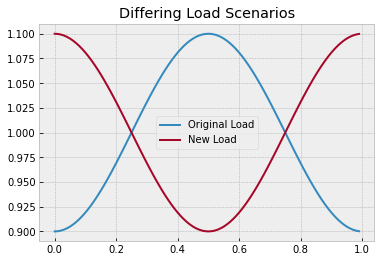

In [19]:
# Change in Load Seasonality
plt.plot(x, l(x), label="Original Load")
A_l = A_l * -1
plt.plot(x, l(x), label="New Load")
plt.legend()
plt.title("Differing Load Scenarios")
plt.show()

In [22]:
# Minimize the load imbalance function
A_l = A_l * -1
alpha = minimize(objective, x0 = 0, method='nelder-mead',
                    options={'xtol': 1e-8, 'disp': True}).x[0]
print(alpha)

A_l = A_l * -1 # Revert Changes

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 74
0.739130432128907


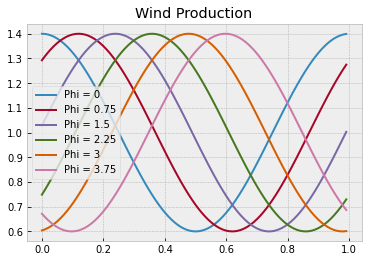

In [26]:
# Seasonal Shift in Wind
phis = [0,0.75,1.5,2.25,3, 3.75]
for phi in phis:
    plt.plot(x, w(x, phi = phi), label = "Phi = {}".format(phi))
plt.legend()
plt.title("Wind Production")
plt.show()

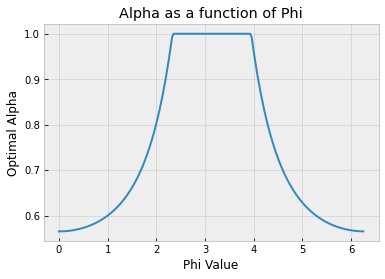

In [29]:
phis = np.arange(0,2*np.pi, np.pi/100)
alphas = []
for phi in phis:
    bnds = [(0,1)]
    alpha = minimize(objective, x0=0, method='TNC',
                     bounds = bnds, options = {'xtol': 1e-8}).x[0]
    alphas.append(alpha)
plt.plot(phis, alphas)
plt.xlabel("Phi Value")
plt.ylabel("Optimal Alpha")
plt.title("Alpha as a function of Phi")
plt.show()

In [33]:
# A Convential Power Source is introduced. 

def c(gamma):
    return 1-gamma

def mismatch_c(alpha, gamma, t):
    return gamma*(alpha*w(t)+(1-alpha)*s(t))+c(t)-l(t)

def objective_c(alpha):
    return 1/T*integrate.quad(lambda t: mismatch_c(alpha,gamma,t)**2,0,T)[0]


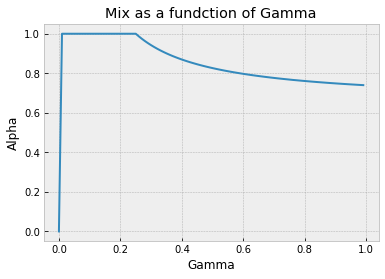

In [37]:
A_l = 0.1 # For some reason wasn't converting back
gammas = np.arange(0,1,0.01)
alphas=[]
for gamma in gammas:
    bnds=[(0,1)]
    alpha = minimize(objective_c, x0=0, method='TNC',
                    bounds=bnds,options={'xtol': 1e-8}).x[0]
    alphas.append(alpha)
plt.plot(gammas, alphas)
plt.xlabel("Gamma")
plt.ylabel("Alpha")
plt.title("Mix as a fundction of Gamma")
plt.show()
